# Fundamentals of Bioimage Analysis: I/O and Processing

## Course Introduction

Welcome to the foundational notebook of the P2N2025 bioimage analysis course! This notebook will teach you the essential skills for working with microscopy data using Python and open-source tools.

## Learning Objectives

By completing this notebook, you will be able to:

1. **Read and write** microscopy files in various formats (CZI, OME-TIFF, etc.)
2. **Navigate and understand** image metadata including pixel sizes and channel information
3. **Visualize** multidimensional microscopy data using matplotlib and napari
4. **Apply basic image processing** operations using scikit-image
5. **Handle** complex multidimensional datasets with proper dimension handling

## Course Structure

This notebook is divided into three main chapters:

### Chapter 1: Reading and Writing Files
- **Objective**: Master the fundamentals of microscopy file I/O
- **Key Skills**: Using bioio for unified file access, understanding metadata, handling different file formats
- **Take-Home**: Bioio provides a standardized way to access diverse microscopy formats

### Chapter 2: Visualization
- **Objective**: Learn effective strategies for visualizing multidimensional data
- **Key Skills**: 2D plotting with matplotlib, 3D visualization with napari, creating publication-quality figures
- **Take-Home**: Proper visualization is essential for understanding your data and debugging analysis pipelines

### Chapter 3: Operations with Scikit-Image
- **Objective**: Apply fundamental image processing operations
- **Key Skills**: Filtering, morphological operations, intensity adjustments, measuring image properties
- **Take-Home**: Basic image processing forms the foundation for all advanced analyses

## Why This Matters

Modern microscopy generates complex, multidimensional datasets that require computational tools to extract meaningful information. This notebook teaches you the fundamental skills that underpin all bioimage analysis workflows - from basic visualization to advanced machine learning applications.

**Let's begin!**


In [1]:
!which python

/usr/local/bin/python


# Library installations on Google Colab
When using Google Colab, we have to make sure that all the libraries that we will use are available in its runtime environment.
Unlike local Python environments that we can reuse after a session, Google Colab will reset the environment after a certain amount of time.
Therefore, each time we start a new Google Colab session, we have to install the libraries in the runtime environment. Luckily, Google Colab already comes with many libraries pre-installed. So, we only have to install the libraries that are not pre-installed.

The following code cell will install all required libraries for this notebook.

In [ ]:
# Pre-installed libraries (will be skipped automatically)
!pip install numpy
!pip install scikit-image
!pip install matplotlib
!pip install seaborn

# To install
!pip install bioio==3.0.0 bioio-czi==2.4.0 bioio-ome-tiff==1.4.0
!pip install "napari[pyqt6]"

# Chapter 1: Reading and Writing Files
In this chapter, we will learn how to read and write microscopy files in various formats. 
Hereto, we will use the convenient `bioio` library that will handle a lot of the heavy lifting for us. 
It provides a unified interface for reading and writing microscopy files in various formats.

## 1.1. Reading Files

**Importing the `bioio` library**

We will start by reading files using the `bioio` library. The following code cell will import all the elements from `bioio` that we will use to read files in this notebook.

In [1]:
# Bioio imports
from bioio import BioImage
from bioio_ome_tiff.writers import OmeTiffWriter
import bioio_base as biob

**Reading a file**

We can now define a variable containing the path to the image file that we want to read. In this example, we have a .czi file, which is a file format used by Zeiss microscopes.

```python
image_path = "/content/sample_data/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"
```

We can then use the `BioImage` class to read the file. 

```python
img = BioImage(image_path)
```
A microscopy image file can contain multiple acquisitions, called scenes in `bioio`. We can specify which scene we want to read, but by default, the first scene will be read.

We can then print the id of the current scene using the `current_scene` attribute.

```python
print(img.current_scene)
```

We can also get a list of all the scenes in the file using the `scenes` attribute.

```python
print(img.scenes)
```

In [2]:
# Define the path to the image file
image_path = "/content/sample_data/hela_prolongdiamond_dapi_tubulin-af488_mitochondria-af568_40x.czi"

# Define a BioImage object
img = BioImage(image_path)  # selects the first scene found

# Get the id of the current operating scene
print(f'Current scene: {img.current_scene}')

# Get a list valid scene ids
print(f'Scenes: {img.scenes}')

0
('0', '1', '2', '3')


**Changing the scene**

To read another acquisition, a.k.a. scene, we can use the `set_scene` method.

This can be done by specifying the scene id, a string that is the name of the scene.
```python
img.set_scene("1")
```

We can also use the `set_scene` method with the scene index.

```python
img.set_scene(1)
```

In [3]:
# Change scene using name
img.set_scene("1")
# Or by scene index
img.set_scene(1)

**Accessing image metadata**

The `BioImage` class provides a lot of metadata about the image. We can access it as attributes of our `img` object.

In [4]:
# Access all the metadata
img.metadata  # returns the metadata object for this file format (XML, JSON, etc.)

<Dimensions [T: 1, C: 3, Z: 14, Y: 512, X: 512]>
TCZYX
512
(1, 3, 14, 512, 512)


In [ ]:
print(img.ome_metadata) # returns the OME-XML metadata as a string

In [ ]:
# Access specific metadata
print(f'Dimensions object: {img.dims}')  # returns a Dimensions object
print(f'Dimension order: {img.dims.order}')  # returns string "TCZYX"
print(f'Size of X dimension: {img.dims.X}')  # returns size of X dimension
print(f'Shape: {img.shape}')  # returns tuple of dimension sizes in TCZYX order

print(f'Channel names: {img.channel_names}')  # returns a list of string channel names found in the metadata
print(f'Z dimension pixel size: {img.physical_pixel_sizes.Z}')  # returns the Z dimension pixel size as found in the metadata
print(f'Y dimension pixel size: {img.physical_pixel_sizes.Y}')  # returns the Y dimension pixel size as found in the metadata
print(f'X dimension pixel size: {img.physical_pixel_sizes.X}')  # returns the X dimension pixel size as found in the metadata

## 1.2. Writing Files

We can also write files using the `bioio` library.

Hereto, we first define the output path, i.e. the path where we want to write the file to.
```python
output_path="/content/images/output.ome.tiff"
```

We can then use the `write_file` method to write the file.

```python
img.write_file("output.ome.tiff")
```

In this case, we are writing the image into an OME-TIFF file that will use the same metadata as the original file.


In [ ]:
# Define the output path
output_path="/content/images/output.ome.tiff"

# Write the file
img.write_file(output_path)

**Creating a new image file from scratch**

In most cases, we are not just opening an existing file and saving it again. 
Often, we have data stored in memory, like a numpy array, that we want to save as a file.
To store metadata together with the raw data, we can use the `bioio` library to create an image file from scratch.

As an example, we will extract the raw data from our image as a numpy array.

In [9]:
# Get the raw data as a numpy array
data = img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array
print(f'Data type: {type(data)}')
print(f'Numpy array shape: {data.shape}')

We can now write the data to a new file. Hereto, we will import the `OmeTiffWriter` class from the `bioio` library that allows us to create a new OME-TIFF file from scratch.

We will also define the metadata that we want to stored in the new file. To do this in a standardized way, we will also import `bioio_base` that contains the base classes for the metadata. For convenience, we call it `biob`.

In [ ]:
# Import the OmeTiffWriter class
from bioio import OmeTiffWriter
import bioio_base as biob

# Get the raw data as a numpy array
data = img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array
print(f'Numpy array shape: {data.shape}')

# Define the output path
output_path="/content/images/output.ome.tiff"

# Define the metadata
write_dim_order = "CZYX"  # required, the dimension order to write the data in
channel_names = ['Mitochondria', 'Tubulin', 'DAPI']
channel_colors = [(255,0,255), (0,255,0), (0,255,255)]  # Magenta/Green/Cyam, colors in RGB format
pixel_size = biob.types.PhysicalPixelSizes(
    img.physical_pixel_sizes.Z,
    img.physical_pixel_sizes.Y,
    img.physical_pixel_sizes.X
    )  # optional, Z, Y, X in microns

# Write the file
OmeTiffWriter.save(
        data,
        output_path,
        write_dim_order,
        channel_names=channel_names,
        channel_colors=channel_colors,
        physical_pixel_sizes=pixel_size,
    )

**Reading the stored file**

We can now read the file we just wrote using the `BioImage` class.

In [ ]:
img = BioImage(output_path)
print(img.ome_metadata)

# Chapter2: visualisation


In [10]:


import napari
from napari.utils import nbscreenshot

In [11]:
print("shape: {}".format(img.shape))
print("Dimension order: {}".format(img.dims.order))

channel_names = img.channel_names
image_scale = [img.physical_pixel_sizes.Z, img.physical_pixel_sizes.Y, img.physical_pixel_sizes.X]
print("Dimension order: {}".format(image_scale))


color_map_list = ['magenta', 'green','cyan']

shape: (1, 3, 14, 512, 512)
Dimension order: TCZYX
Dimension order: [1.0, 0.4151329104819196, 0.4151329104819196]


In [ ]:


viewer = napari.Viewer(ndisplay=3) # use ndisplay=2 for 2D

for c in range(0,img.dims.C):
    viewer.add_image(img.get_image_data("CZYX", C=c, T=0), contrast_limits=[0, 4095], name=channel_names[c],scale=image_scale, colormap=color_map_list[c], blending='additive')

# Rotate the image in 3D
viewer.camera.angles = (0, 15, 35)

nbscreenshot(viewer, canvas_only=True) # canvas_only=True removes the napari GUI




Available platform plugins are: minimalegl, wayland-egl, eglfs, xcb, linuxfb, wayland, offscreen, vkkhrdisplay, vnc, minimal.


Available platform plugins are: minimalegl, wayland-egl, eglfs, xcb, linuxfb, wayland, offscreen, vkkhrdisplay, vnc, minimal.



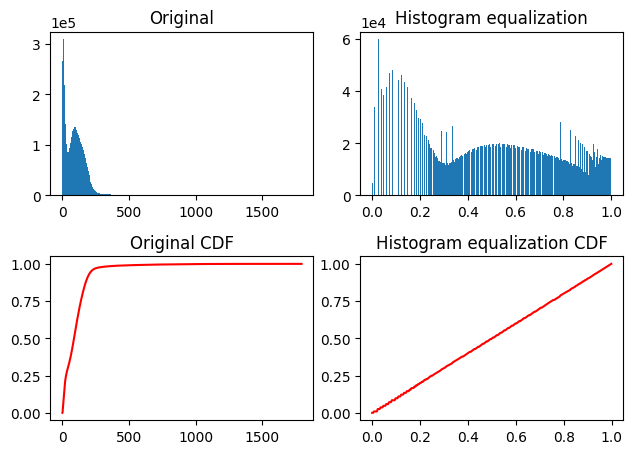

In [4]:
from matplotlib import pyplot as plt

from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)

# Helper function for plotting histograms.
def plot_hist(ax, data, title=None):
    ax.hist(data.ravel(), bins=256)
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0))

    if title:
        ax.set_title(title)

nuclei_channel = 2
nuclei = img.get_image_data("CZYX", C=nuclei_channel, T=0)

equalized = exposure.equalize_hist(nuclei)

fig, ((a, b), (c, d)) = plt.subplots(nrows=2, ncols=2)

plot_hist(a, nuclei, title="Original")
plot_hist(b, equalized, title="Histogram equalization")

cdf, bins = exposure.cumulative_distribution(nuclei.ravel())
c.plot(bins, cdf, "r")
c.set_title("Original CDF")

cdf, bins = exposure.cumulative_distribution(equalized.ravel())
d.plot(bins, cdf, "r")
d.set_title("Histogram equalization CDF")

fig.tight_layout()

# Chapter3: operation with scikit-image

In [5]:
import numpy as np
from skimage.filters import gaussian
from skimage import filters
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.io import imread

from skimage.restoration import rolling_ball

In [6]:
nuclei_channel = 2  # DAPI

print("img shape: {}".format(img.shape))
print("Dimension order: {}".format(img.dims.order))

image_scale = [img.physical_pixel_sizes.Z, img.physical_pixel_sizes.Y, img.physical_pixel_sizes.X]
print("Dimension order: {}".format(image_scale))

color_map = 'cyan'

nuclei = img.get_image_data("CZYX", C=nuclei_channel, T=0).squeeze()
print("nuclei shape: {}".format(nuclei.shape))

img shape: (1, 3, 14, 512, 512)
Dimension order: TCZYX
Dimension order: [1.0, 0.4151329104819196, 0.4151329104819196]
nuclei shape: (14, 512, 512)


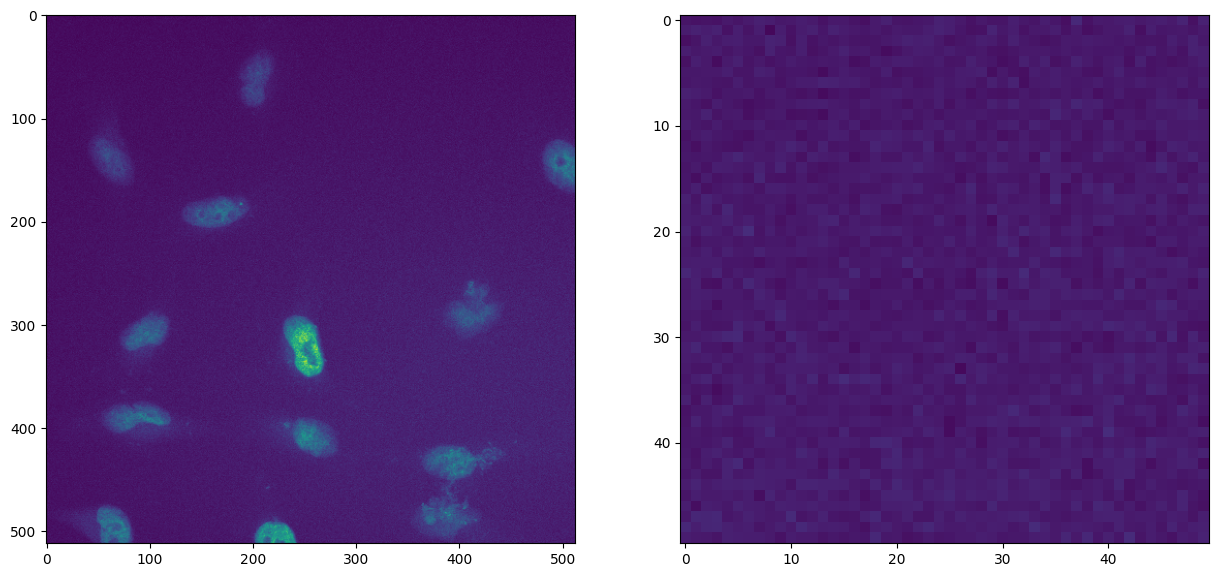

In [7]:
# open dataset and extract single plane

# zoom in by cropping a part out
noisy_nuclei_zoom = nuclei[7,200:250, 250:300]
noisy_nuclei = nuclei[7,:,:].squeeze()

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].imshow(noisy_nuclei, vmin=0, vmax=1900)
axs[1].imshow(noisy_nuclei_zoom, vmin=np.min(noisy_nuclei), vmax=np.max(noisy_nuclei))

median range: (21, 1539)


/usr/local/lib/python3.12/dist-packages/skimage/filters/rank/generic.py:332: UserWarning: Bad rank filter performance is expected due to a large number of bins (1762), equivalent to an approximate bitdepth of 10.8.
  image, footprint, out, mask, n_bins = _preprocess_input(


mean range: (29, 1571)
gaussian range: (0.0005653091127100218, 0.02270749504557262)


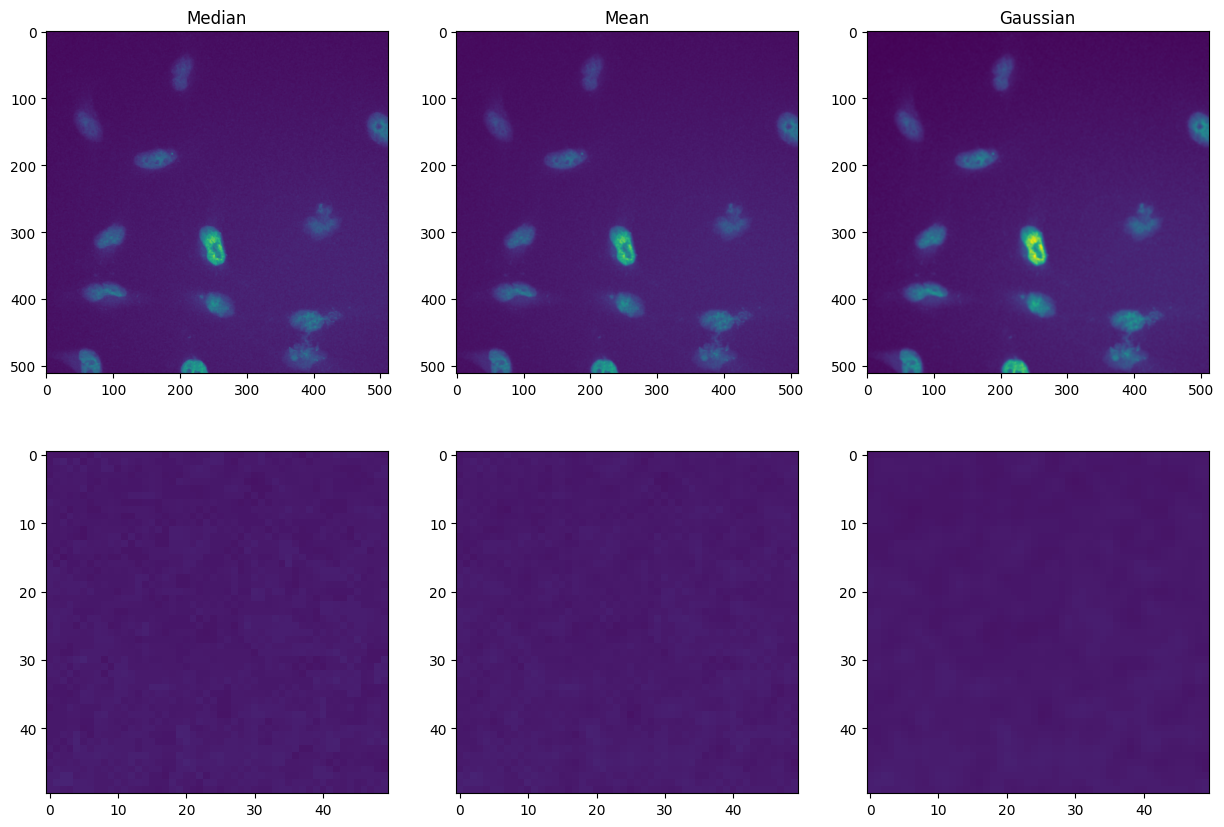

In [8]:
median_filtered = filters.median(noisy_nuclei, disk(1))
print("median range: ({}, {})".format(np.min(median_filtered), np.max(median_filtered)))
mean_filtered = filters.rank.mean(noisy_nuclei, disk(1))
print("mean range: ({}, {})".format(np.min(mean_filtered), np.max(mean_filtered)))
gaussian_filtered = filters.gaussian(noisy_nuclei, sigma=1)
print("gaussian range: ({}, {})".format(np.min(gaussian_filtered), np.max(gaussian_filtered)))

fig, axs = plt.subplots(2, 3, figsize=(15,10))

# first row
axs[0, 0].imshow(median_filtered, vmin=0, vmax=1900)
axs[0, 0].set_title("Median")
axs[0, 1].imshow(mean_filtered, vmin=0, vmax=1900)
axs[0, 1].set_title("Mean")
axs[0, 2].imshow(gaussian_filtered, vmin=np.min(gaussian_filtered), vmax=np.max(gaussian_filtered))
axs[0, 2].set_title("Gaussian")

# second row
axs[1, 0].imshow(median_filtered[200:250, 250:300], vmin=0, vmax=1900)
axs[1, 1].imshow(mean_filtered[200:250, 250:300], vmin=0, vmax=1900)
axs[1, 2].imshow(gaussian_filtered[200:250, 250:300], vmin=np.min(gaussian_filtered), vmax=np.max(gaussian_filtered))

background_rolling range: (11, 140)


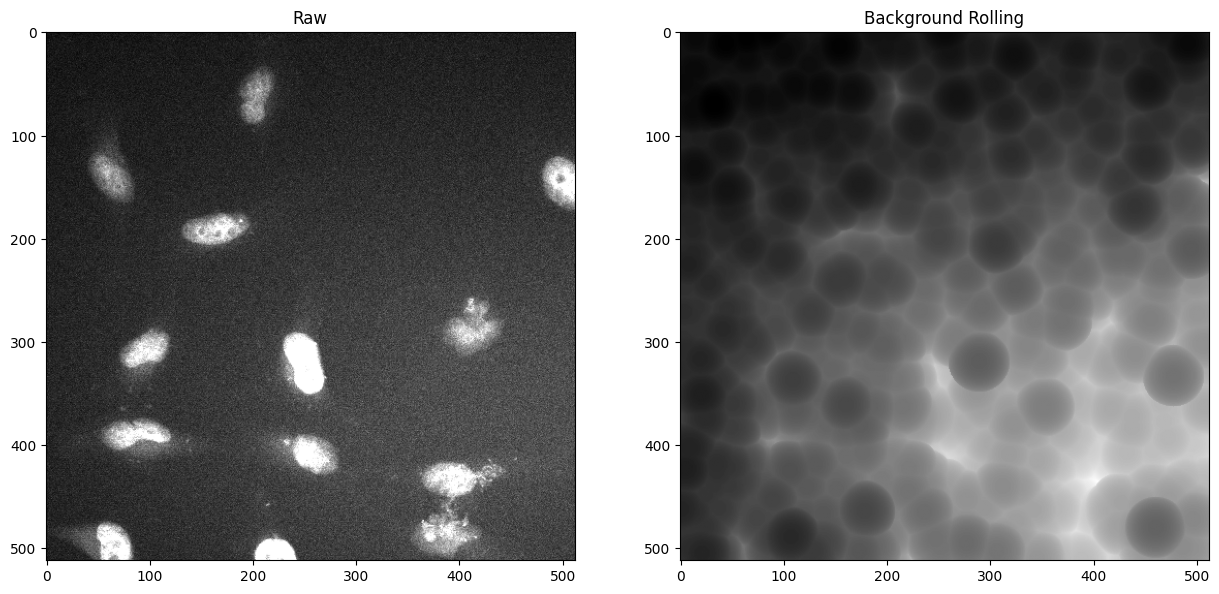

In [9]:


background_rolling = rolling_ball(noisy_nuclei, radius=30)
print("background_rolling range: ({}, {})".format(np.min(background_rolling), np.max(background_rolling)))


fig, axs = plt.subplots(1, 2, figsize=(15,10))

# first row
axs[0].imshow(noisy_nuclei, vmin=0, vmax=600, cmap='gray')
axs[0].set_title("Raw")
axs[1].imshow(background_rolling,  vmin=np.min(background_rolling), vmax=np.max(background_rolling), cmap='gray')
axs[1].set_title("Background Rolling")

#plt.imshow(background_rolling, cmap='viridis', interpolation='nearest')
plt.show()



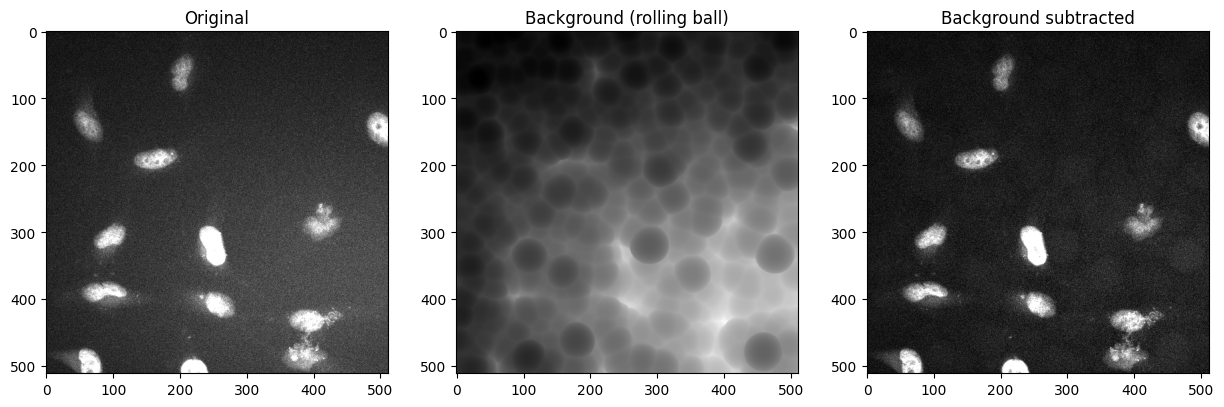

In [10]:
nuclei_rolling = noisy_nuclei - background_rolling

fig, axs = plt.subplots(1, 3, figsize=(15,10))

# first row
axs[0].imshow(noisy_nuclei, vmin=0, vmax=600, cmap='gray')
axs[0].set_title("Original")
axs[1].imshow(background_rolling, vmin=np.min(background_rolling), vmax=np.max(background_rolling), cmap='gray')
axs[1].set_title("Background (rolling ball)")
axs[2].imshow(nuclei_rolling, vmin=0, vmax=600, cmap='gray')
axs[2].set_title("Background subtracted")

plt.show()

In [11]:
nuclei_channel = 2  # DAPI

data=img.get_image_data("CZYX", T=0)  # returns 4D CZYX numpy array
nuclei = img.get_image_data("CZYX", C=nuclei_channel, T=0).squeeze()

nuclei_slice = nuclei[7,:,:].squeeze()

In [12]:


threshold = 500

binary_image = nuclei_slice > threshold

print(nuclei_slice)
print(binary_image)

[[ 66  83  59 ...  49  85  82]
 [ 79  57  53 ...  58  42  70]
 [ 47  51  64 ...  44  95  89]
 ...
 [ 94  45  70 ... 165 172 120]
 [ 68  64  67 ... 166 130 138]
 [ 52  69  89 ... 156 201 136]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


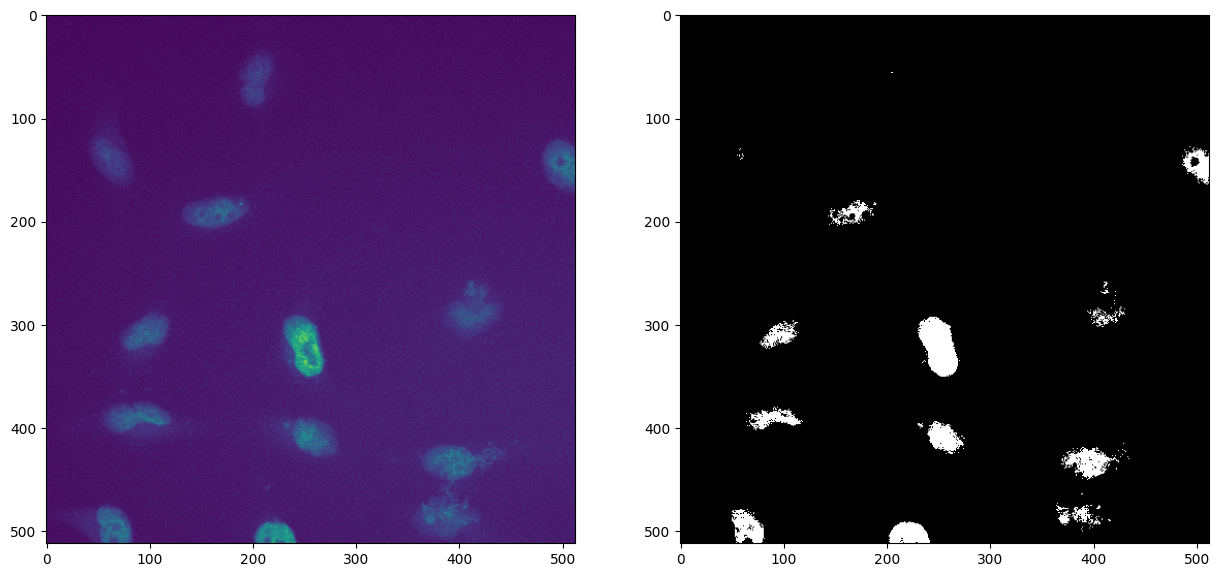

In [13]:


fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(nuclei_slice, vmin=0, vmax=2000)
axs[1].imshow(binary_image, cmap='gray')



gaussian range: (0.0007385679425556874, 0.017450195753333016)


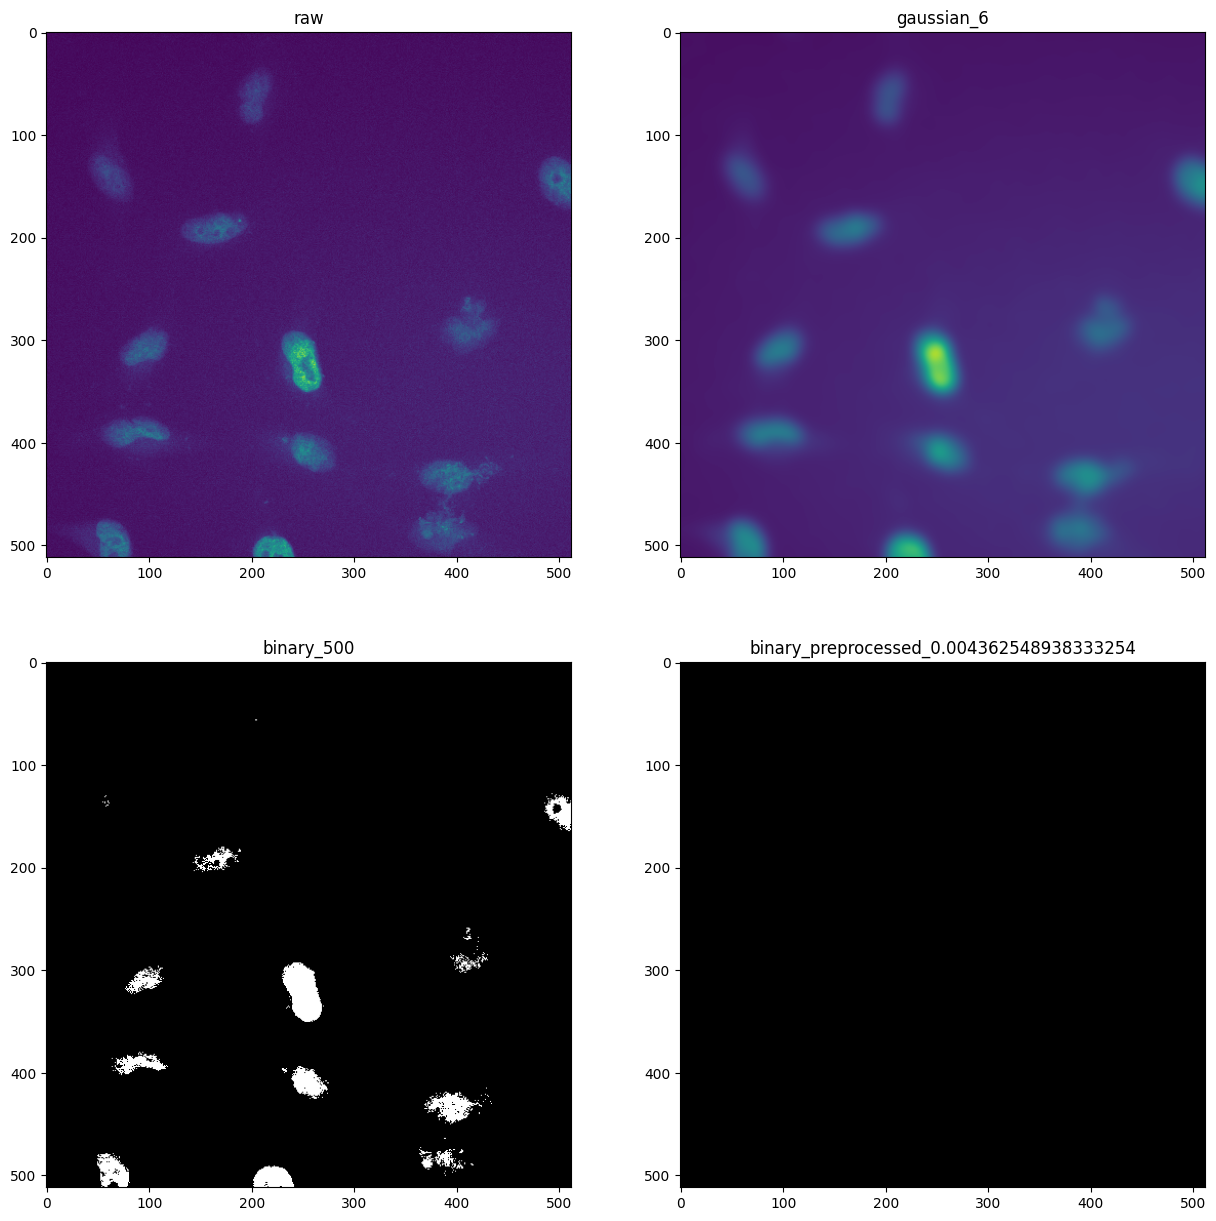

In [14]:


sigma = 6
gaussian_filtered = gaussian(nuclei_slice, sigma=sigma)

threshold_processed = 0.25 * np.max(gaussian_filtered)
processed_binary_image = gaussian_filtered > threshold

fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].imshow(nuclei_slice, vmin=0, vmax=2000)
axs[0, 0].set_title("raw")

axs[0,1].imshow(gaussian_filtered, vmin=0, vmax=0.02)
axs[0, 1].set_title("gaussian_" + str(sigma))

axs[1,0].imshow(binary_image, cmap='gray')
axs[1,0].set_title("binary_" + str(threshold))

axs[1,1].imshow(processed_binary_image, cmap='gray')
axs[1,1].set_title("binary_preprocessed_" + str(threshold_processed))

print("gaussian range: ({}, {})".format(np.min(gaussian_filtered), np.max(gaussian_filtered)))



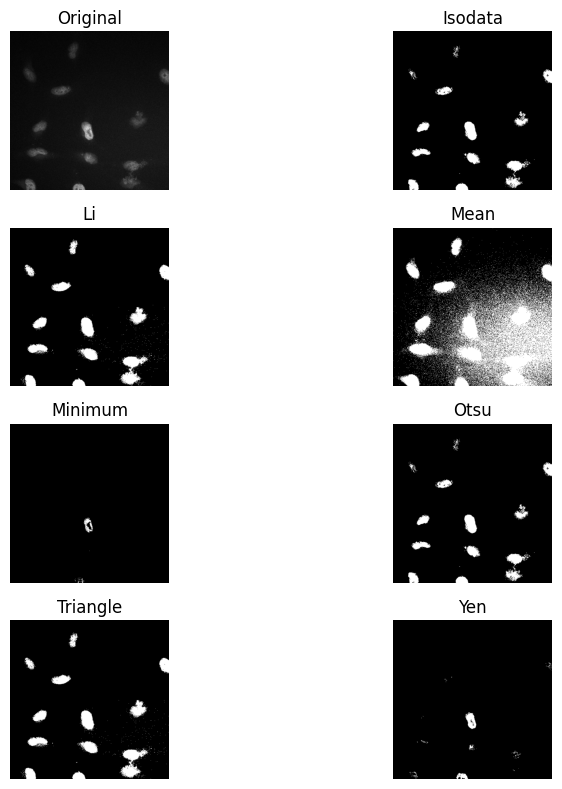

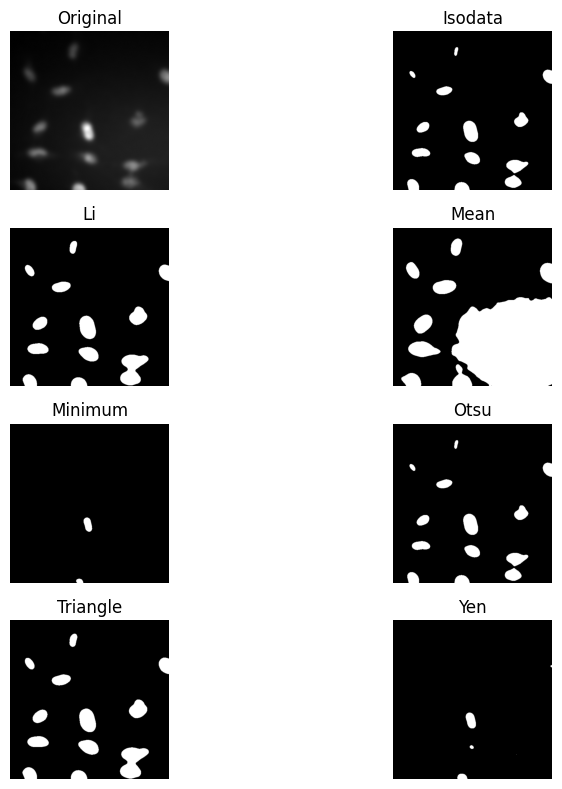

In [15]:


from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(nuclei_slice, figsize=(10, 8), verbose=False)
plt.show()

fig, ax = try_all_threshold(gaussian_filtered, figsize=(10, 8), verbose=False)
plt.show()

